<a href="https://colab.research.google.com/github/Nireplag/ML_zoomcamp/blob/main/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
# load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# subset dataframe with ocean_proximity is either '<1H OCEAN' or 'INLAND'

df_set1 = df[df.ocean_proximity == '<1H OCEAN']
df_set2 = df[df.ocean_proximity == 'INLAND']

df_set = pd.concat([df_set1, df_set2])
df_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [5]:
# data preparation
df_set = df_set.fillna(0)

df_set['median_house_value'] = np.log1p(df_set['median_house_value']) # apply log to column



In [6]:
# prepare data split
df_set.reset_index(inplace=True)
del df_set['index']

#split datasets

df_full_train, df_test = train_test_split(df_set, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# create data variables

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [7]:
# create a DictVectorizer matrix

dv = DictVectorizer(sparse = True)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))

In [30]:
# train decision tree
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [32]:
# Question 1
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.30]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



In [43]:
# train a random forest model
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [44]:
# Question 2
y_pred = rf.predict(X_val)
mean_squared_error(y_val, y_pred, squared = False)


0.25261208990627454

In [ ]:
universe = np.linspace(10, 200, 20).astype(int)
rmse = []

for n in universe:
  rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_val)
  rmse.append(mean_squared_error(y_val, y_pred, squared = False))


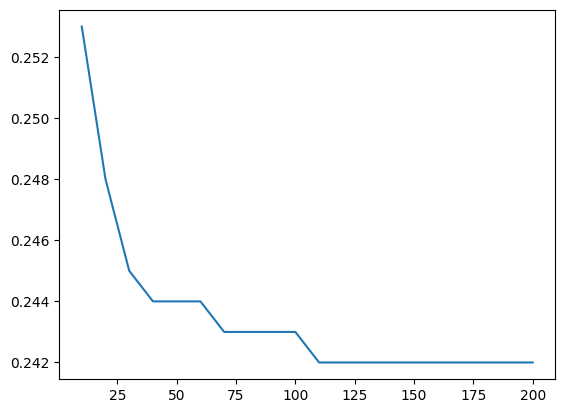

In [55]:
# question 3
rmse3 = []
for num in rmse:
  rmse3.append(round(num,3))
plt.plot(universe, rmse3)
plt.show()

In [7]:
universe = np.linspace(10, 200, 20).astype(int)
max_depth = [10, 15, 20, 25]

uni = []
dept = []
rmse = []

for depth in max_depth:
  for n in universe:
    uni.append(n)
    dept.append(depth)
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth = depth)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse.append(mean_squared_error(y_val, y_pred, squared = False))


In [13]:
# question 4
df4 = pd.DataFrame()

#df4['n_estimators'] = uni
df4['max_depth'] = dept
df4['rmse'] = rmse

df4.groupby(by='max_depth').mean('rmse').sort_values(by='rmse', ascending = True)

,rmse
max_depth,
20,0.243188
25,0.243382
15,0.244094
10,0.253387


In [16]:
rf = RandomForestRegressor(n_estimators = 10,
                            max_depth=20,
                           random_state = 1,
                           n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [19]:
# question 5
df5 = pd.DataFrame()
df5['features'] = list(dv.get_feature_names_out())
df5['importance'] = rf.feature_importances_

df5.sort_values(by='importance', ascending = False)

,features,importance
4,median_income,0.339304
5,ocean_proximity=<1H OCEAN,0.251202
6,ocean_proximity=INLAND,0.106462
2,latitude,0.099400
3,longitude,0.086741
1,housing_median_age,0.031819
7,population,0.028455
9,total_rooms,0.023777
8,total_bedrooms,0.016533
0,households,0.016307


In [8]:
!pip install xgboost

In [13]:
import xgboost as xgb

In [26]:
features = dv.get_feature_names_out().astype(str)
features = np.char.replace(features, '<', '')
features = np.char.replace(features, '=' , '')
features = np.char.replace(features, ' ' , '_')
features = list(features)

In [27]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [28]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [48]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [49]:
%%capture output

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [50]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [51]:
s1 = parse_xgb_output(output)
s1.tail()

,num_iter,train_rmse,val_rmse
16,80,0.12202,0.23514
17,85,0.11867,0.23490
18,90,0.11591,0.23490
19,95,0.11293,0.23463
20,99,0.11110,0.23478


In [52]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [53]:
%%capture output2

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [55]:
s2 = parse_xgb_output(output2)
s2.tail()

,num_iter,train_rmse,val_rmse
16,80,0.17194,0.23889
17,85,0.16950,0.23812
18,90,0.16699,0.23739
19,95,0.16431,0.23633
20,99,0.16289,0.23585


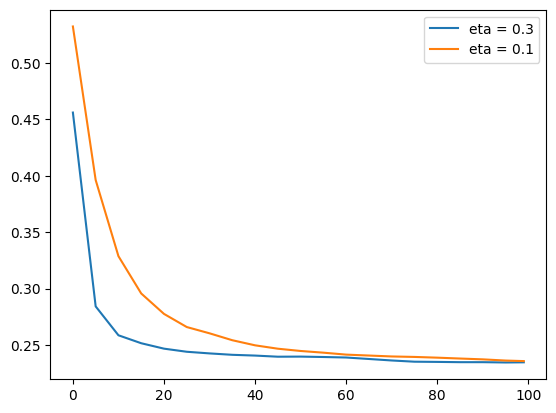

In [56]:
# question 6 -> 0.3
plt.plot(s1.num_iter, s1.val_rmse, label='eta = 0.3')
plt.plot(s2.num_iter, s2.val_rmse, label='eta = 0.1')
plt.legend()